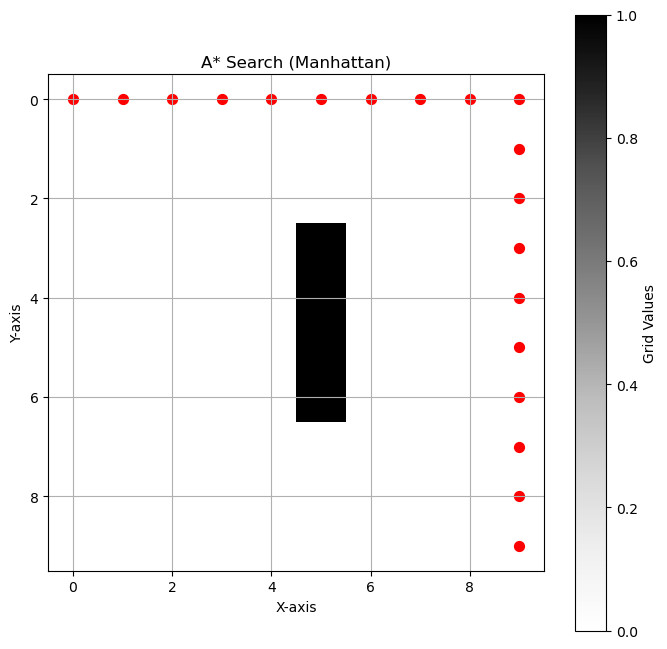

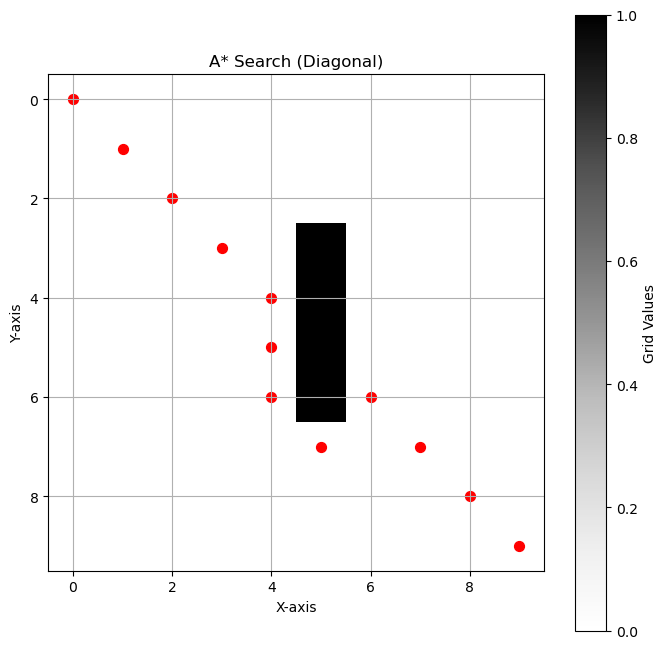

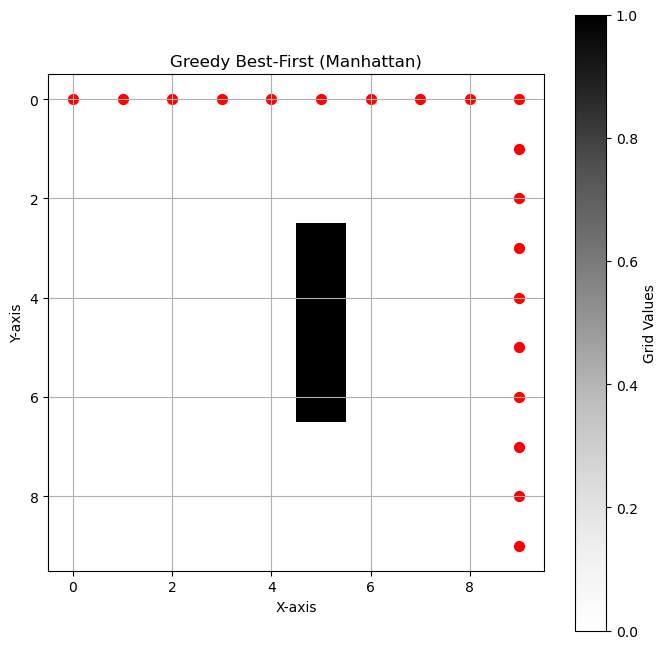

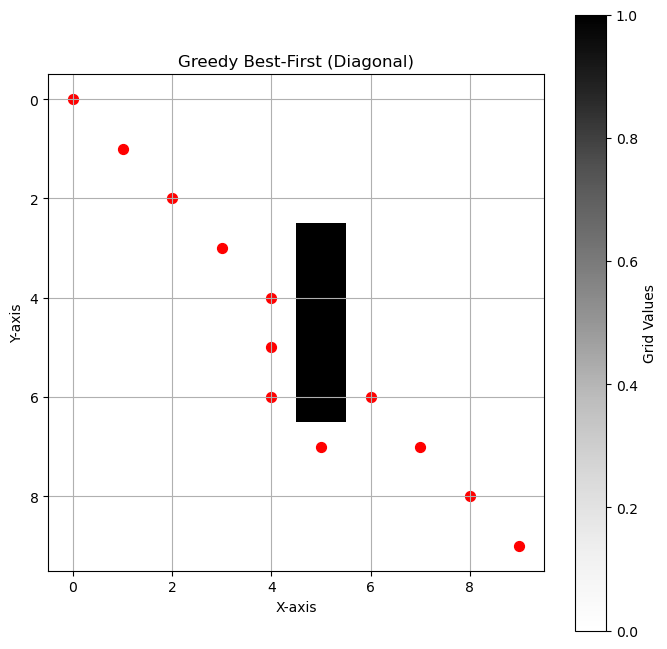

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(grid, path=None, title="Pathfinding Visualization"):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap="Greys", origin="upper")
    plt.title(title)
    plt.colorbar(label="Grid Values")

    if path:
        for (x, y) in path:
            plt.scatter(y, x, c="red", s=50)

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

def heuristic_manhattan(node, goal):
    return abs(goal[0] - node[0]) + abs(goal[1] - node[1])

def heuristic_diagonal(node, goal):
    return max(abs(goal[0] - node[0]), abs(goal[1] - node[1]))

def a_star(grid, start, goal, heuristic_func, allow_diagonal=False):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    g_score = {start: 0}
    f_score = {start: heuristic_func(start, goal)}
    parent = {}
    closed_set = set()

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    if allow_diagonal:
        directions += [(-1, -1), (-1, 1), (1, -1), (1, 1)]

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(parent, current)

        closed_set.add(current)

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if not (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols):
                continue

            if grid[neighbor[0], neighbor[1]] == 1 or neighbor in closed_set:
                continue

            tentative_g_score = g_score[current] + 1

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                parent[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic_func(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  

def greedy_best_first(grid, start, goal, heuristic_func, allow_diagonal=False):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    parent = {}
    closed_set = set()

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    if allow_diagonal:
        directions += [(-1, -1), (-1, 1), (1, -1), (1, 1)]

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(parent, current)

        closed_set.add(current)

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if not (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols):
                continue

            if grid[neighbor[0], neighbor[1]] == 1 or neighbor in closed_set:
                continue

            if neighbor not in parent:
                parent[neighbor] = current
                heapq.heappush(open_set, (heuristic_func(neighbor, goal), neighbor))

    return None 

def reconstruct_path(parent, current):
    path = []
    while current in parent:
        path.append(current)
        current = parent[current]
    path.append(current)
    return path[::-1]

grid = np.zeros((10, 10))
grid[3:7, 5] = 1  
start = (0, 0)
goal = (9, 9)

path_a_star_manhattan = a_star(grid, start, goal, heuristic_manhattan, allow_diagonal=False)
plot_grid(grid, path_a_star_manhattan, "A* Search (Manhattan)")

path_a_star_diagonal = a_star(grid, start, goal, heuristic_diagonal, allow_diagonal=True)
plot_grid(grid, path_a_star_diagonal, "A* Search (Diagonal)")

path_greedy_manhattan = greedy_best_first(grid, start, goal, heuristic_manhattan, allow_diagonal=False)
plot_grid(grid, path_greedy_manhattan, "Greedy Best-First (Manhattan)")

path_greedy_diagonal = greedy_best_first(grid, start, goal, heuristic_diagonal, allow_diagonal=True)
plot_grid(grid, path_greedy_diagonal, "Greedy Best-First (Diagonal)")
